# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [4]:
import joblib
# Load the pickle file using joblib
data_dtm = joblib.load("data_dtm.pkl")

In [5]:
data = data_dtm.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
able,2,0,1,0,0,1,1,2,3,1,0,2
accent,0,1,0,0,0,0,4,1,1,0,0,0
accident,1,0,0,2,0,0,0,0,0,1,15,0
accidentally,1,1,2,1,0,0,0,1,0,0,0,0
act like,1,0,2,0,1,1,4,0,0,0,0,0


In [6]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('wanna', 21),
  ('husband', 20),
  ('pregnant', 15),
  ('scared', 10),
  ('toilet', 9),
  ('mom', 9),
  ('dont wanna', 9),
  ('body', 8),
  ('smell', 7),
  ('ladies', 6),
  ('married', 6),
  ('pussy', 5),
  ('seven', 5),
  ('months', 5),
  ('doctor', 5),
  ('means', 5),
  ('got married', 5),
  ('paper', 5),
  ('huge', 5),
  ('business', 4),
  ('push', 4),
  ('trap', 4),
  ('chinese', 4),
  ('homeless', 4),
  ('um', 4),
  ('time like', 4),
  ('playing', 4),
  ('hole', 4),
  ('park', 4),
  ('blow', 4)],
 'anthony': [('joke', 34),
  ('grandma', 18),
  ('mad', 14),
  ('mom', 11),
  ('san', 11),
  ('today', 9),
  ('francisco', 8),
  ('loved', 8),
  ('san francisco', 8),
  ('comedian', 7),
  ('card', 7),
  ('college', 7),
  ('tragedy', 6),
  ('ive got', 6),
  ('death', 6),
  ('shows', 6),
  ('gun', 6),
  ('forget', 5),
  ('worry', 5),
  ('talked', 5),
  ('wanna', 5),
  ('laugh', 5),
  ('died', 5),
  ('killed', 5),
  ('fuckin', 4),
  ('soon', 4),
  ('asked', 4),
  ('tonight', 4),
  

In [7]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
wanna, husband, pregnant, scared, toilet, mom, dont wanna, body, smell, ladies, married, pussy, seven, months
---
anthony
joke, grandma, mad, mom, san, today, francisco, loved, san francisco, comedian, card, college, tragedy, ive got
---
bill
gun, jesus, trouble, sudden, religion, hit, bring, fuckin, anybody, goddamn, dont understand, wife, figure, whoa
---
bo
repeat, eye, um, sad, brain, song, deep, yeah yeah, magic, joke, meant, idiot, pussy, pretty
---
dave
young, mad, motherfucker, american, wife, mr, havent, brother, generation, shut fuck, game, crowd, rape, war
---
hasan
mom, brown, shes like, bike, york, birthday, new york, married, outside, la, country, past, open, class
---
jim
guns, girlfriend, gun, business, south, class, girls, like fucking, ticket, mothers, bring, cunts, wanna, right im
---
joe
wanna, stupid, texas, bullshit, smart, fuck fuck, dudes, religion, earth, president, santa, mom, lived, figure
---
john
mom, wife, john, president, past, dinner, mr, office, ah,

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [8]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['wanna',
 'husband',
 'pregnant',
 'scared',
 'toilet',
 'mom',
 'dont wanna',
 'body',
 'smell',
 'ladies',
 'married',
 'pussy',
 'seven',
 'months',
 'doctor',
 'means',
 'got married',
 'paper',
 'huge',
 'business',
 'push',
 'trap',
 'chinese',
 'homeless',
 'um',
 'time like',
 'playing',
 'hole',
 'park',
 'blow',
 'joke',
 'grandma',
 'mad',
 'mom',
 'san',
 'today',
 'francisco',
 'loved',
 'san francisco',
 'comedian',
 'card',
 'college',
 'tragedy',
 'ive got',
 'death',
 'shows',
 'gun',
 'forget',
 'worry',
 'talked',
 'wanna',
 'laugh',
 'died',
 'killed',
 'fuckin',
 'soon',
 'asked',
 'tonight',
 'thats good',
 'im good',
 'gun',
 'jesus',
 'trouble',
 'sudden',
 'religion',
 'hit',
 'bring',
 'fuckin',
 'anybody',
 'goddamn',
 'dont understand',
 'wife',
 'figure',
 'whoa',
 'basically',
 'honest',
 'shot',
 'like right',
 'hug',
 'joke',
 'hang',
 'know just',
 'thank thank',
 'right im',
 'couch',
 'ya',
 'somebody',
 'turned',
 'stories',
 'finally',
 'repeat',
 

In [9]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('wanna', 7),
 ('mom', 5),
 ('married', 4),
 ('joke', 4),
 ('means', 3),
 ('um', 3),
 ('ive got', 3),
 ('gun', 3),
 ('bring', 3),
 ('wife', 3),
 ('pretty', 3),
 ('rape', 3),
 ('brother', 3),
 ('new york', 3),
 ('class', 3),
 ('pussy', 2),
 ('doctor', 2),
 ('business', 2),
 ('mad', 2),
 ('loved', 2),
 ('college', 2),
 ('forget', 2),
 ('worry', 2),
 ('laugh', 2),
 ('killed', 2),
 ('fuckin', 2),
 ('soon', 2),
 ('jesus', 2),
 ('religion', 2),
 ('hit', 2),
 ('anybody', 2),
 ('figure', 2),
 ('hang', 2),
 ('right im', 2),
 ('somebody', 2),
 ('yeah yeah', 2),
 ('book', 2),
 ('father', 2),
 ('porn', 2),
 ('sort', 2),
 ('young', 2),
 ('mr', 2),
 ('dinner', 2),
 ('la', 2),
 ('york', 2),
 ('past', 2),
 ('facebook', 2),
 ('late', 2),
 ('earth', 2),
 ('bag', 2),
 ('texas', 2),
 ('president', 2),
 ('lived', 2),
 ('office', 2),
 ('boy', 2),
 ('marriage', 2),
 ('husband', 1),
 ('pregnant', 1),
 ('scared', 1),
 ('toilet', 1),
 ('dont wanna', 1),
 ('body', 1),
 ('smell', 1),
 ('ladies', 1),
 ('seven', 1

In [10]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['wanna',
 'mom',
 'married',
 'joke',
 'means',
 'um',
 'ive got',
 'gun',
 'bring',
 'wife',
 'pretty',
 'rape',
 'brother',
 'new york',
 'class']

In [12]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# Read in cleaned data
data_clean = joblib.load("mydata_clean.pkl")

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words)) 

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

C:\Users\CGDXK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['got', 'ive', 'new', 'york'] not in stop_words.
  warnings.warn(


In [13]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


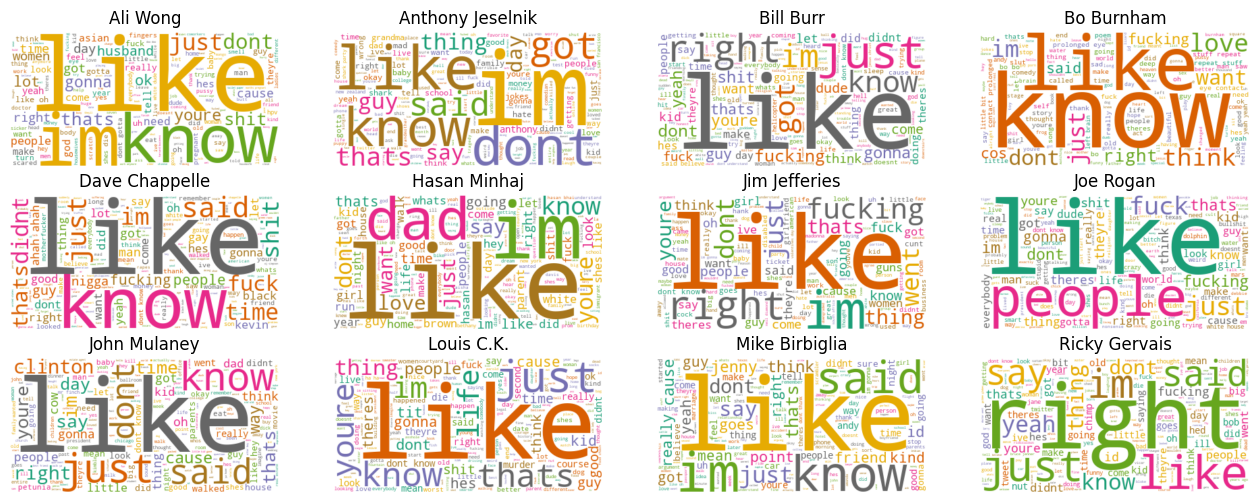

In [14]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [16]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
3,Bo Burnham,424
1,Anthony Jeselnik,443
9,Louis C.K.,473
0,Ali Wong,479
8,John Mulaney,542
4,Dave Chappelle,561
5,Hasan Minhaj,570
11,Ricky Gervais,573
10,Mike Birbiglia,592
7,Joe Rogan,605


In [17]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
3,Bo Burnham,424,785,60,13.083333
1,Anthony Jeselnik,443,832,59,14.101695
0,Ali Wong,479,851,60,14.183333
9,Louis C.K.,473,849,58,14.637931
11,Ricky Gervais,573,1162,79,14.708861
4,Dave Chappelle,561,1012,67,15.104478
6,Jim Jefferies,606,1269,77,16.480519
5,Hasan Minhaj,570,1208,73,16.547945
10,Mike Birbiglia,592,1262,76,16.605263
8,John Mulaney,542,1058,62,17.064516


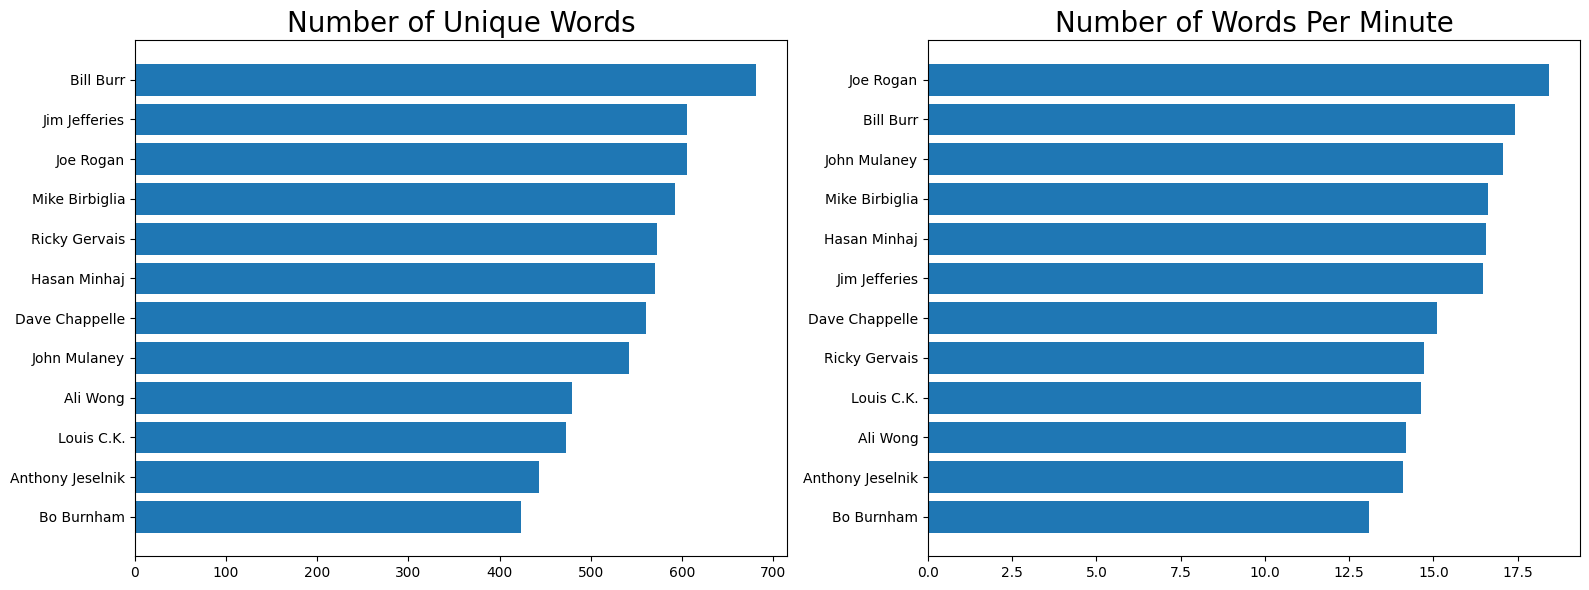

In [18]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [19]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('wanna', 7),
 ('mom', 5),
 ('married', 4),
 ('joke', 4),
 ('means', 3),
 ('um', 3),
 ('ive got', 3),
 ('gun', 3),
 ('bring', 3),
 ('wife', 3),
 ('pretty', 3),
 ('rape', 3),
 ('brother', 3),
 ('new york', 3),
 ('class', 3),
 ('pussy', 2),
 ('doctor', 2),
 ('business', 2),
 ('mad', 2),
 ('loved', 2),
 ('college', 2),
 ('forget', 2),
 ('worry', 2),
 ('laugh', 2),
 ('killed', 2),
 ('fuckin', 2),
 ('soon', 2),
 ('jesus', 2),
 ('religion', 2),
 ('hit', 2),
 ('anybody', 2),
 ('figure', 2),
 ('hang', 2),
 ('right im', 2),
 ('somebody', 2),
 ('yeah yeah', 2),
 ('book', 2),
 ('father', 2),
 ('porn', 2),
 ('sort', 2),
 ('young', 2),
 ('mr', 2),
 ('dinner', 2),
 ('la', 2),
 ('york', 2),
 ('past', 2),
 ('facebook', 2),
 ('late', 2),
 ('earth', 2),
 ('bag', 2),
 ('texas', 2),
 ('president', 2),
 ('lived', 2),
 ('office', 2),
 ('boy', 2),
 ('marriage', 2),
 ('husband', 1),
 ('pregnant', 1),
 ('scared', 1),
 ('toilet', 1),
 ('dont wanna', 1),
 ('body', 1),
 ('smell', 1),
 ('ladies', 1),
 ('seven', 1

In [21]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['rape', 'fuckin', 'jesus','pretty']]
data_profanity = pd.concat([data_bad_words.rape + data_bad_words.fuckin, data_bad_words.jesus+data_bad_words.pretty], axis=1)
data_profanity.columns = ['abuse_word', 'healthy_word']
data_profanity

,abuse_word,healthy_word
ali,2,0
anthony,4,1
bill,11,16
bo,4,10
dave,6,0
hasan,0,1
jim,3,0
joe,1,5
john,1,3
louis,0,11


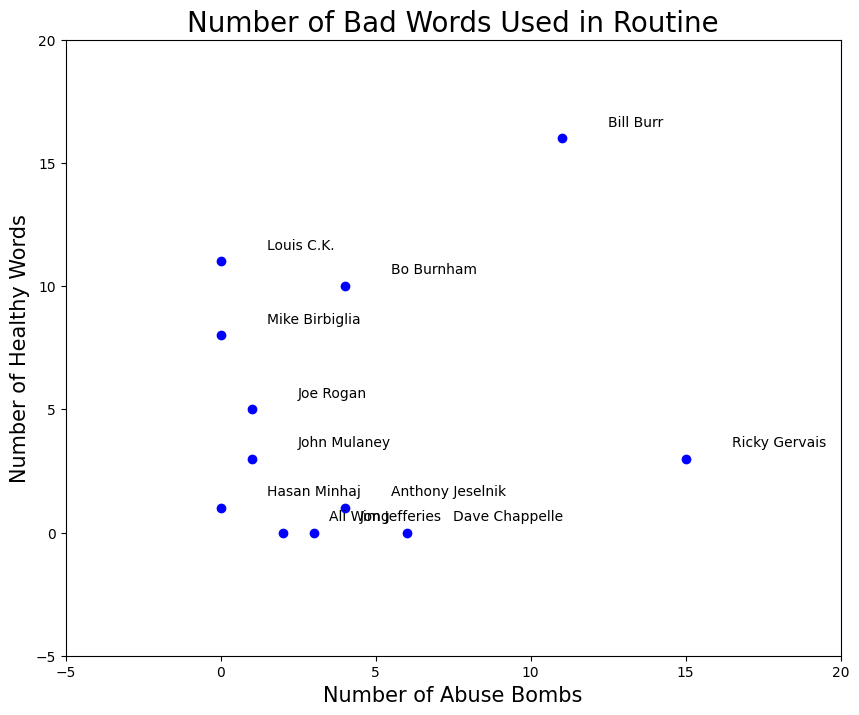

In [24]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.abuse_word.loc[comedian]
    y = data_profanity.healthy_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 20)
    plt.ylim(-5,20) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of Abuse Bombs', fontsize=15)
plt.ylabel('Number of Healthy Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.